In [25]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [56]:
Signal1 = pd.read_csv("signal1.csv",header=None)
Signal2 = pd.read_csv("signal2.csv",header=None)
Signal3 = pd.read_csv("signal3.csv",header=None)
Signal4 = pd.read_csv("signal4.csv",header=None)
Signal5 = pd.read_csv("signal5.csv",header=None)
Signal6 = pd.read_csv("signal6.csv",header=None)
Dataframe = pd.concat([Signal1,Signal2,Signal3,Signal4,Signal5,Signal6],axis=1,ignore_index=True)

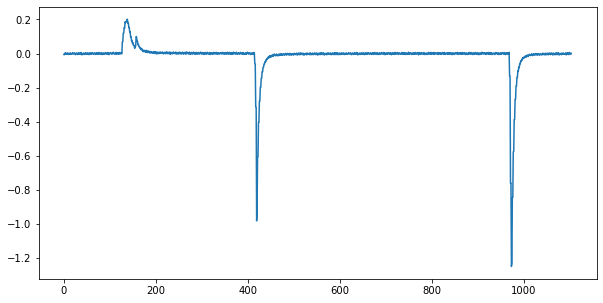

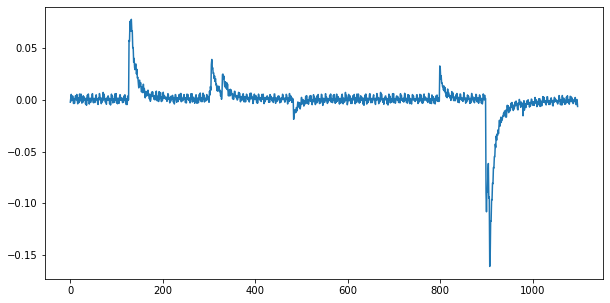

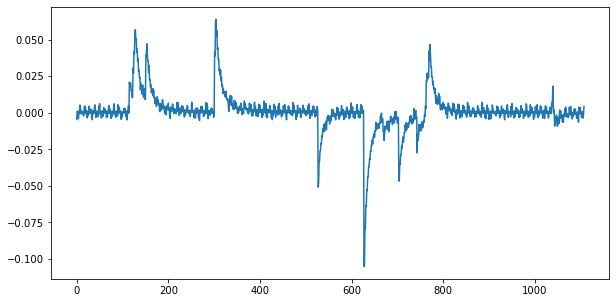

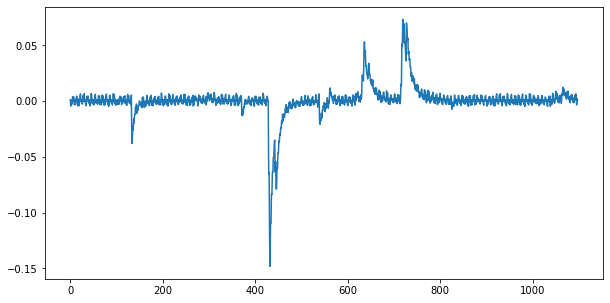

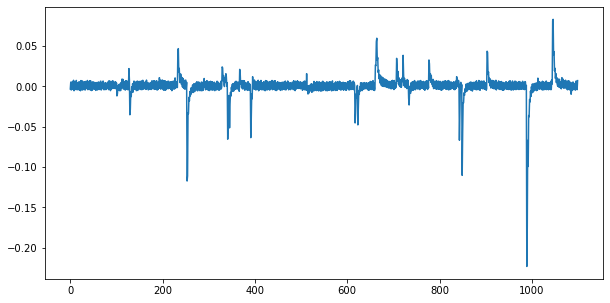

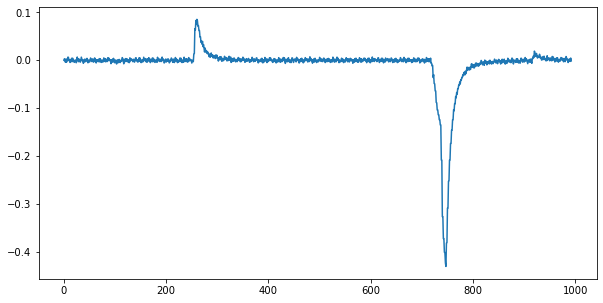

In [71]:
figs = {}
axs = {}
for i in range(Dataframe.shape[1]):
    figs[i] = plt.figure(figsize=(10,5))
    axs[i] =figs[i].add_subplot(111)
    axs[i].plot(Dataframe[i])  

In [68]:
Dataframe.shape[1]

6

In [37]:
Fsignal

[             0
 0    -0.004578
 1     0.000793
 2     0.001160
 3    -0.003052
 4    -0.004089
 ...        ...
 1103  0.000610
 1104  0.000793
 1105 -0.003662
 1106 -0.001221
 1107  0.004272
 
 [1108 rows x 1 columns],
              0
 0    -0.002197
 1     0.001404
 2     0.005371
 3    -0.000854
 4    -0.000061
 ...        ...
 1093 -0.001404
 1094 -0.004639
 1095  0.000061
 1096  0.000366
 1097 -0.006348
 
 [1098 rows x 1 columns],
              0
 0    -0.006226
 1    -0.000366
 2    -0.005493
 3     0.004517
 4     0.003052
 ...        ...
 1099  0.006470
 1100  0.001831
 1101 -0.002197
 1102 -0.004822
 1103  0.001770
 
 [1104 rows x 1 columns],
              0
 0    -0.003296
 1     0.005249
 2    -0.004578
 3     0.005005
 4    -0.003784
 ...        ...
 1095  0.005249
 1096  0.006653
 1097 -0.003540
 1098 -0.004089
 1099  0.007080
 
 [1100 rows x 1 columns],
              0
 0     0.001099
 1    -0.004456
 2     0.000916
 3    -0.002869
 4    -0.000366
 ...        ...
 1093  0